In [24]:
import tensorflow as tf
from tensorflow import keras as k
import numpy as np
import matplotlib.pyplot as plt 

In [25]:
from sklearn.datasets import load_breast_cancer

In [26]:
data = load_breast_cancer()

In [27]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [28]:
X,y = data["data"], data["target"]

In [29]:
X.shape

(569, 30)

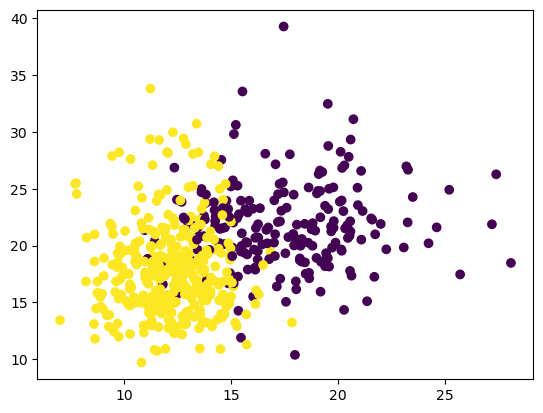

In [30]:
plt.scatter(X[:,0],X[:,1],c=y)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                496       
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


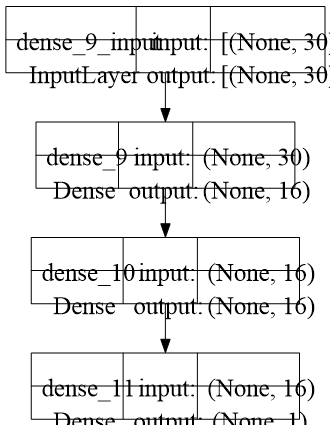

In [31]:
model = k.Sequential([k.layers.Dense(16,activation=k.activations.relu,input_shape=[30]),
                      k.layers.Dense(16,activation=k.activations.relu),
                      k.layers.Dense(1,activation=k.activations.sigmoid)])
model.summary()
k.utils.plot_model(model,show_shapes=True)

In [32]:
model.compile(optimizer=k.optimizers.Adam(),loss=k.losses.binary_crossentropy,metrics=[k.metrics.binary_accuracy])

In [33]:
epochs = 150
model.fit(X,y,epochs=epochs)

Epoch 1/150
18/18 [==============================] - 0s 1ms/step - loss: 35.5204 - binary_accuracy: 0.5729
Epoch 2/150
18/18 [==============================] - 0s 1ms/step - loss: 6.5562 - binary_accuracy: 0.4306
Epoch 3/150
18/18 [==============================] - 0s 1ms/step - loss: 1.0613 - binary_accuracy: 0.7118
Epoch 4/150
18/18 [==============================] - 0s 1ms/step - loss: 0.5133 - binary_accuracy: 0.8383
Epoch 5/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3860 - binary_accuracy: 0.8594
Epoch 6/150
18/18 [==============================] - 0s 974us/step - loss: 0.3466 - binary_accuracy: 0.8805
Epoch 7/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3506 - binary_accuracy: 0.8840
Epoch 8/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3202 - binary_accuracy: 0.8805
Epoch 9/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3489 - binary_accuracy: 0.8699
Epoch 10/150
18/18 [=======================

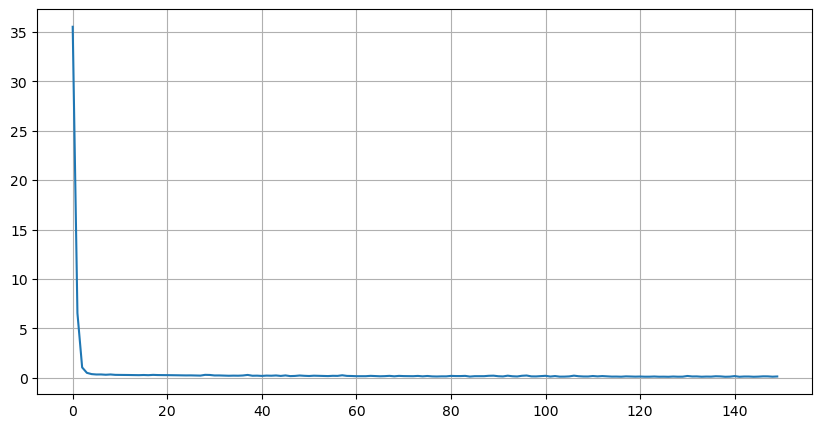

In [34]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), model.history.history["loss"])
plt.grid(True)

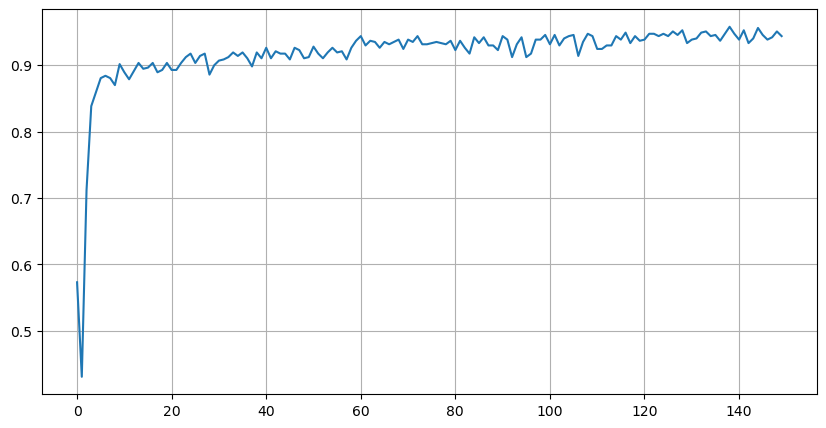

In [35]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), model.history.history["binary_accuracy"])
plt.grid(True)

In [36]:
y_pred = model.predict(X)

18/18 [==============================] - 0s 824us/step


In [39]:
y_pred_class = np.where(y_pred[:,0]>=0.5,1,0)

In [40]:
k.metrics.binary_accuracy(y,y_pred_class)

<tf.Tensor: shape=(), dtype=float32, numpy=0.94727594>